# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Putri Intan Octavia Br Sipayung
- **Email:** putriintanss12@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

Proses penyewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll dapat mempengaruhi kondisi penyewaan.
- Berdasarkan 4 kondisi cuaca yang berpengaruh terhadap penyewaan sepeda, kondisi cuaca manakah tingkat penyewaan sepeda tertinggi?
- Manakah jumlah penyewa sepeda tertinggi, Casual (Tidak Berlangganan) atau Registered (Berlangganan)?
- Bagaimana distribusi pengguna "Registered" pada saat "Workingday" vs "Weekend"?

## Import Semua Packages/Library yang Digunakan

In [343]:
#Untuk komputasi numerik dan pengolahan array/matriks
import numpy as np

#Untuk manipulasi dan analisis data berbentuk tabel
import pandas as pd

#Untuk membuat grafik dan plot data
import matplotlib.pyplot as plt

#Untuk Visualisasi data statistik dengan tampilan yang menarik
import seaborn as sns

## Data Wrangling

### Gathering Data

In [344]:
#Membaca dataset "day.csv" dari URL GitHub dan memuatnya sebagai DataFrame
day_df = pd.read_csv("https://raw.githubusercontent.com/putriintans/Proyek-Analisis-Data-Bike-Sharing-Dataset/refs/heads/main/day.csv")

#Menampilkan 5 baris pertama untuk memverifikasi isi data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [345]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/putriintans/Proyek-Analisis-Data-Bike-Sharing-Dataset/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel **df_day**

In [346]:
#Menampilkan informasi ringkas tentang DataFrame
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [347]:
#Mengecek jumlah nilai yang hilang (NaN) di setiap kolom pada DataFrame
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [348]:
#Memberikan statistik deskriptif dari kolom-kolom numerik di DataFrame
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [349]:
#Mencetak jumlah total baris duplikat yang ada di dalam DataFrame
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai Tabel **df_hour**

In [350]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [351]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [352]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [353]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Mengubah nama kolom agar dapat lebih mudah dibaca di dataset **day_df** & **hour_df**

In [354]:
#Mengubah nama kolom day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [355]:
#Mengubah nama kolom hour_df
hour_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [356]:
# Mengubah isi kolom agar mudah dipahami
# Mengubah season menjadi: 1:Spring, 2:Summer, 3:Winter, 4:Autumn
day_df.season.replace((1,2,3,4), ('Spring','Summer','Winter','Autumn'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Winter','Autumn'), inplace=True)

# Mengubah weather_situation menjadi: 1:Sunny, 2:Cloudy, 3:Windy 4:Heavy_RainSnow
day_df.weather_situation.replace((1,2,3,4), ('Sunny','Cloudy','Windy','Heavy_Rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Sunny','Cloudy','Windy','Heavy_Rainsnow'), inplace=True)

#Mengubah isi kolom month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Mengubah year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# Mengubah isi kolom one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis **df_day**

In [357]:
#Menampilkan sample data dari df_day sebanyak 5 data
day_df.sample(5)

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
54,55,2011-02-24,Spring,2011,Feb,0,Thursday,1,Cloudy,0.295652,0.289191,0.697391,0.250496,100,1707,1807
107,108,2011-04-18,Summer,2011,Apr,0,Monday,1,Sunny,0.512500,0.503146,0.542500,0.163567,669,2760,3429
25,26,2011-01-26,Spring,2011,Jan,0,Wednesday,1,Windy,0.217500,0.203600,0.862500,0.293850,34,472,506
288,289,2011-10-16,Autumn,2011,Oct,0,Sunday,0,Sunny,0.511667,0.503154,0.486667,0.281717,1748,3293,5041
723,724,2012-12-24,Spring,2012,Dec,0,Monday,1,Cloudy,0.231304,0.258900,0.791304,0.077230,174,746,920


In [358]:
#Memberikan statistik deskriptif lengkap dari semua kolom dalam dataFrame day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Winter,2012,Jan,NaN,Saturday,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [359]:
#Untuk melihat total pengguna casual (Tidak Berlangganan) dan registered (Berlangganan) per tahun dari dataset day_df
day_df.groupby(by="year").agg({
    "casual": ["sum"],
    "registered": ["sum"]
})

,casual,registered
,sum,sum
year,,
2011,247252,995851
2012,372765,1676811


In [360]:
# Memfilter data untuk weekend (contoh: hari Sabtu dan Minggu)
weekend_data = day_df[day_df['workingday'] == 0]['registered'].dropna()
# Memfilter data untuk working days (contoh: hari kerja)
workingdays_data = day_df[day_df['workingday'] == 1]['registered'].dropna()

Exploratory Data Analysis **df_hour**

In [361]:
#Menampilkan sample data dari df_hour sebanyak 5 data
hour_df.sample(5)

,instant,dteday,season,year,month,hr,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
1527,1528,2011-03-09,Spring,2011,Mar,0,0,Wednesday,1,Sunny,0.26,0.2879,0.65,0.0896,0,9,9
11754,11755,2012-05-09,Summer,2012,May,23,0,Wednesday,1,Windy,0.48,0.4697,0.82,0.1940,8,47,55
17149,17150,2012-12-22,Spring,2012,Dec,8,0,Saturday,0,Sunny,0.26,0.2121,0.44,0.6119,0,29,29
2002,2003,2011-03-29,Summer,2011,Mar,7,0,Tuesday,1,Sunny,0.22,0.1970,0.41,0.3582,5,128,133
3610,3611,2011-06-04,Summer,2011,Jun,8,0,Saturday,0,Sunny,0.60,0.6212,0.46,0.0896,29,96,125


In [362]:
#Memberikan statistik deskriptif lengkap dari semua kolom dalam dataFrame hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hr,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Winter,2012,May,NaN,NaN,Saturday,NaN,Sunny,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [363]:
#Untuk melihat total pengguna berdasarkan weather_situation
hour_df.groupby(by="weather_situation").count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,weather_situation,count_cr
0,Sunny,2338173
1,Cloudy,795952
2,Windy,158331
3,Heavy_Rainsnow,223


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berdasarkan 4 kondisi cuaca yang berpengaruh terhadap penyewaan sepeda, kondisi cuaca manakah tingkat penyewaan sepeda tertinggi?

<ipython-input-364-04b4182ba934>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


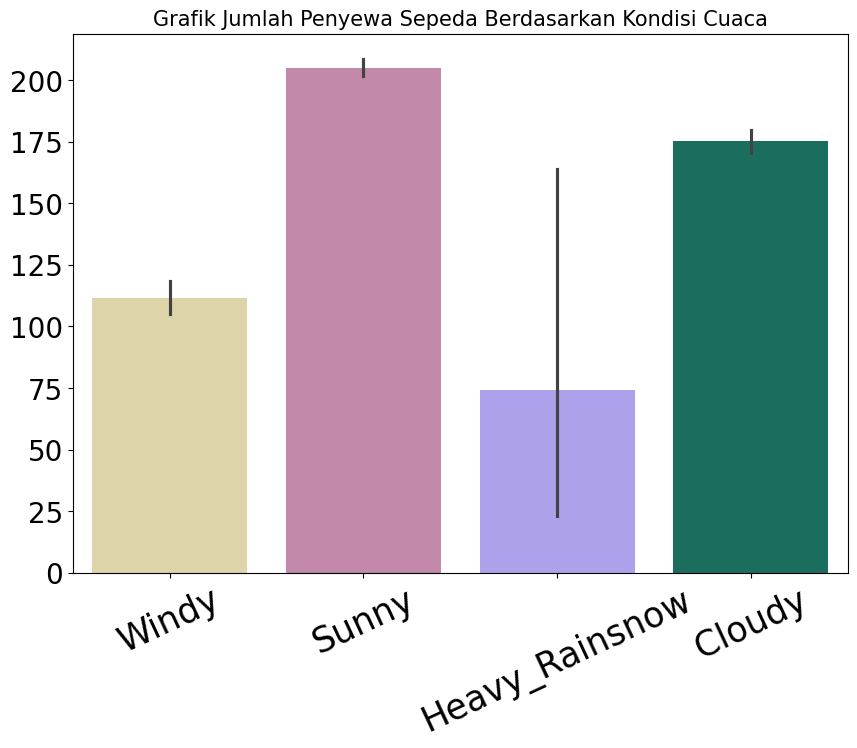

In [364]:
# mengatur warna
colors = ["#E6D9A2", "#CB80AB", "#A594F9", "#0D7C66"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (10, 7)
fig, ax = plt.subplots(figsize=(10, 7))

# Buat barplot untuk y="count_cr" dan x="weather_situation", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="weather_situation",  # Perbaikan: x="weather_situation"
        data=hour_df.sort_values(by="weather_situation", ascending=False),
        palette=colors,
        ax=ax
    )

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=15)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=25, rotation=25)
ax.tick_params(axis='y', labelsize=20)

# menampilkan plot
plt.show()

Berdasarkan grafik jumlah penyewa sepeda berdasarkan kondisi cuaca, dapat disimpulkan penyewa sepeda tertinggi ada pada cuaca "Sunny", disusul dengan "Cloudy", kemudian "Windy" dan terakhir "Heavy_rainsnow".

### Pertanyaan 2: Manakah jumlah penyewa sepeda tertinggi, Casual (Tidak Berlangganan) atau Registered (Berlangganan)?

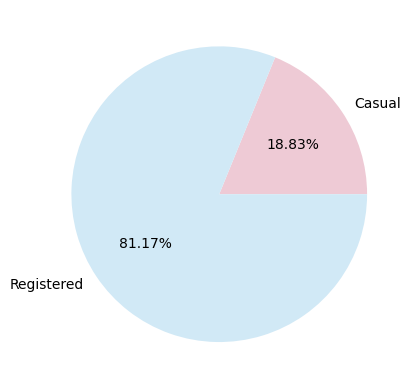

In [365]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%2.2f%%', colors=["#EECAD5", "#D1E9F6"])

# Menampilkan pie plot
plt.show()

Jumlah penyewa sepeda tertinggi adalah penyewa "Registered"

## Pertanyaan Ketiga : Bagaimana distribusi pengguna "Registered" pada saat "Workingday" vs "Weekend"?

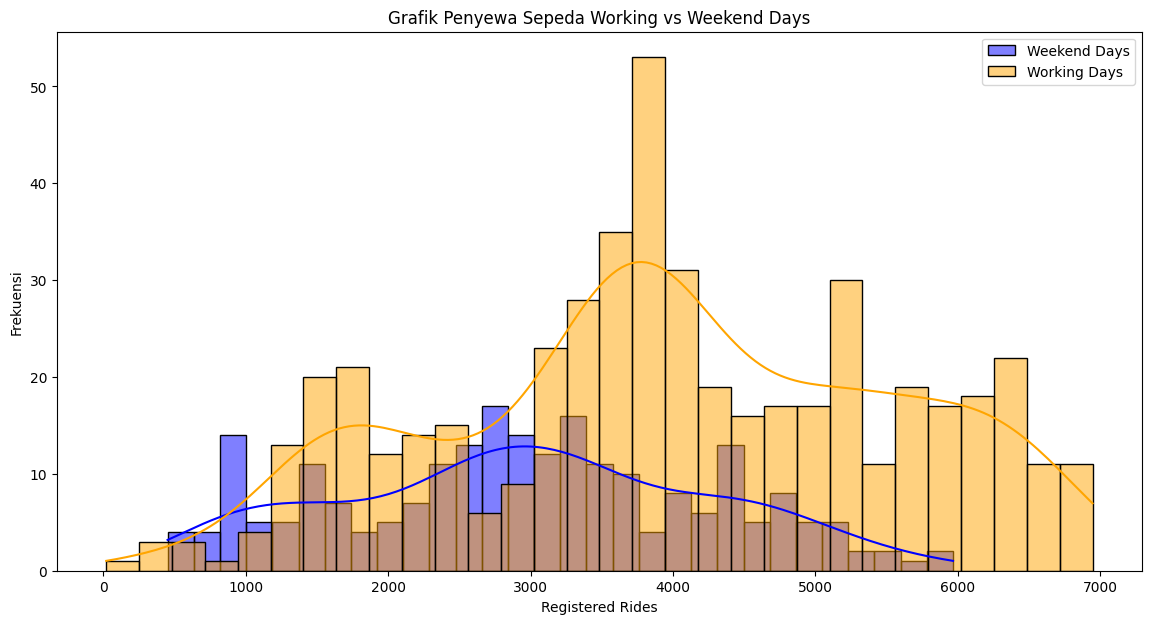

In [366]:
# Membuat subplot untuk histogram
plt.figure(figsize=(14, 7))

# Histogram untuk weekend data
sns.histplot(weekend_data, bins=30, label='Weekend Days', color='blue', kde=True, alpha=0.5)

# Histogram untuk working days data
sns.histplot(workingdays_data, bins=30, label='Working Days', color='orange', kde=True, alpha=0.5)

# Mengatur label dan judul
plt.xlabel('Registered Rides')
plt.ylabel('Frekuensi')
plt.title('Grafik Penyewa Sepeda Working vs Weekend Days')
plt.legend()

# Menampilkan plot
plt.show()


Jumlah penyewa sepeda "Registered" pada "Working day" lebih tinggi daripada saat "Weekend day".

## Analisis Lanjutan

**Clustering** bertujuan mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu tanpa menggunakan algoritma machine learning. Saya menggunakan Clustering tipe Manual Grouping

In [367]:
hour_df.groupby(by="one_of_week").count_cr.nunique().sort_values(ascending=False)

,count_cr
one_of_week,
Wednesday,616
Saturday,609
Thursday,606
Tuesday,598
Monday,595
Friday,584
Sunday,571


In [368]:
hour_df.groupby(by="month").count_cr.nunique().sort_values(ascending=False)

,count_cr
month,
Aug,560
Jun,558
Sep,557
Jul,551
May,551
Oct,535
Apr,502
Nov,480
Mar,440


In [369]:
hour_df.groupby(by="season").count_cr.nunique().sort_values(ascending=False)

,count_cr
season,
Winter,760
Summer,721
Autumn,690
Spring,482


## Conclusion

- **Pertanyaan 1** :Berdasarkan 4 kondisi cuaca yang berpengaruh terhadap penyewaan sepeda, kondisi cuaca manakah tingkat penyewaan sepeda tertinggi?
Conclusion : Jumlah tertinggi tingkat penyewaan sepeda berdasarkan 4 kondisi cuaca yaknipada kondisi cuaca "Sunny", tertinggi kedua adalah "Cloudy", ketiga adalah "Windy" dan terakhir adalah "Heavy_snow".
- **Pertanyaan 2** : Manakah jumlah penyewa sepeda tertinggi, Casual (Tidak Berlangganan) atau Registered (Berlangganan)? Conclusion : Jumlah penyewa penyewa sepeda dengan status "Registered" dengan jumlah 81.17% lebih tinggi, dibandingkan dengan status "Casual" dengan jumlah 18.83%.
- **Pertanyaan 3** : Bagaimana distribusi pengguna "Registered" pada saat "Workingday" vs "Weekend"? Conclusion : Kontribusi penyewa sepeda "Registered" tertinggi adalah pada saat "Working day" dibandingkan "Week day".